In [1]:
from datetime import timedelta
from mockseries.trend import LinearTrend
from mockseries.seasonality import SinusoidalSeasonality
from mockseries.noise import RedNoise, GaussianNoise
from datetime import datetime
from mockseries.utils import datetime_range
from mockseries.utils import plot_timeseries, write_csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
trend = LinearTrend(coefficient=2, time_unit=timedelta(days=10), flat_base=100)
seasonality = SinusoidalSeasonality(amplitude=30, period=timedelta(days=200)) \
              + SinusoidalSeasonality(amplitude=4, period=timedelta(days=30)) \
              + SinusoidalSeasonality(amplitude=10, period=timedelta(days=2))
noise = GaussianNoise(mean=4, std=5)

timeseries = trend + seasonality + noise

In [4]:
ts_index = datetime_range(
    granularity=timedelta(days=1),
    start_time=datetime(1990, 1, 1),
    end_time=datetime(2000, 1, 1),
)
entire_ts_values = timeseries.generate(ts_index)

In [50]:
def create_binary_file(values, filename):
    length = np.array([len(values)], dtype=np.float32)
    values_numpy = np.array(values, dtype=np.float32)
    values_numpy = np.insert(values_numpy, 0, length)
    values_numpy.tofile(f"{filename}.bin")

In [51]:
def create_subset(range_size, values):
    start_index = np.random.randint(0, len(values) - range_size)
    end_index = start_index + range_size
    create_binary_file(values[start_index:end_index], f"range-{range_size}_of-{filename}")

In [5]:
ts_values = entire_ts_values[0:int(len(entire_ts_values))]

In [ ]:
filename = f"entire_{len(ts_values)}_entries"
print(len(ts_values))
create_binary_file(ts_values, filename)
steps = [100, 1000, 10000, 100000]
for step in steps:
    create_subset(step, ts_values)

87648


NameError: name 'create_binary_file' is not defined

In [6]:
write_csv(ts_index, ts_values, "hello_mockseries.csv")

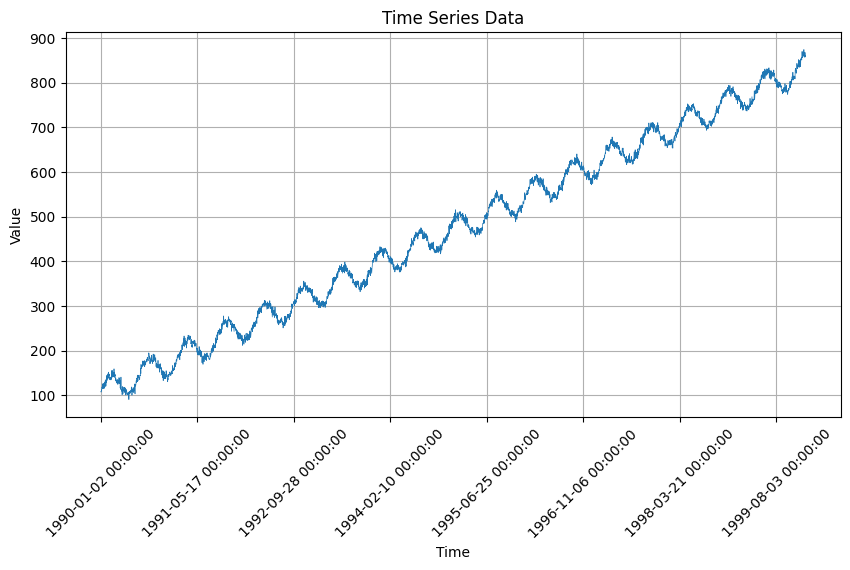

In [8]:
# Leggi il file CSV
df = pd.read_csv("hello_mockseries.csv", sep=';', decimal=".")

# Crea il grafico
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[:, 0], df.iloc[:, 1], linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.title('Time Series Data')
plt.grid(True)

# Genera solo 10 tick sull'asse x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# Salva il grafico come SVG
plt.savefig("hello_mockseries.svg", format='svg')
# Salva il grafico anche in formato PDF
plt.savefig("hello_mockseries.pdf", format='pdf')